<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Ago_25_26/Tarea1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**En un cuaderno terminar la implementación de mínimos cuadrados regularizado y el método de cross validación para selección de modelos**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
file = '/content/drive/MyDrive/Machine_Learning/olympic100m_men.txt'
data = np.loadtxt(file, delimiter = ',').T

In [8]:
x = data[0]
y = data[1]

In [20]:
def w_n(x,y,norder, lmbd): #Minimos cuadrados regularizado para orden n
  x = np.asarray([x])
  X = np.ones_like(x)
  for n in range(1, norder+1):
    X = np.append(X, x**n,axis = 0)
  N = len(x)
  X = X.T
  t = y
  X_tX = np.matmul(X.T,X)
  I = np.ones_like(X_tX)
  X_tXNI = X_tX+(N*lmbd*I)
  invX_tXNI = np.linalg.inv(X_tXNI)
  X_tt = np.matmul(X.T, t)
  w = np.matmul(invX_tXNI,X_tt)
  cost = 0
  f = 0
  for i in range(len(w)):
    f += w[i]*x**i
  cost = (y-f)**2
  cost = cost.sum()
  return w,cost

In [10]:
x = data[0]
#normalización de los datos
x_norm = (x-1896)/4

**Grafica con métodos cuadrados regularizado**

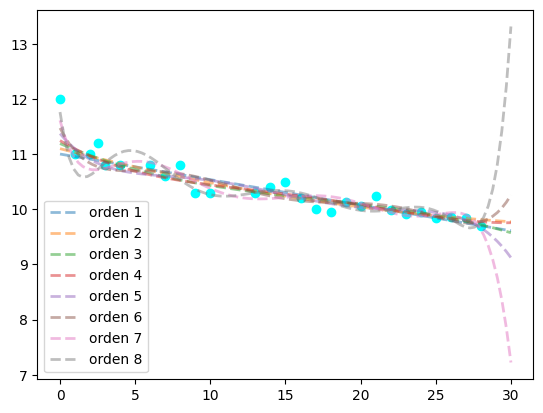

In [27]:
norder = 8
x_test = np.linspace(0,30,100)
plt.scatter(x_norm,y, color = 'cyan')
lmbd = 0.1
for n in range(1, norder+1):
  w_test,cost = w_n(x_norm,y,n,lmbd)
  f_test = 0
  for i in range(len(w_test)):
    f_test += w_test[i]*x_test**i
  plt.plot(x_test, f_test, '--', linewidth = 2, label = f'orden {n}', alpha = 0.5)

plt.legend()

**En $\lambda=0$ nos debe regresar el método de mínimos cuadrados sin regularizar**

Text(0.5, 1.0, 'Gráfica de orden vs costo')

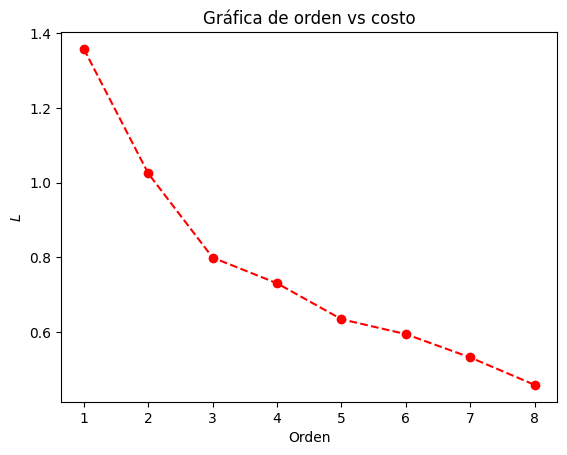

In [44]:
norder = 8
norder_l = [1,2,3,4,5,6,7,8]
x_test = np.linspace(0,30,100)
f_cost = np.ones_like(norder_l, dtype = float)
lmbd = 0
for n in range(1, norder+1):
  w_test,cost = w_n(x_norm,y,n, lmbd)
  f_cost[n-1] = cost
plt.plot(norder_l,f_cost, '--o', color = 'red')
plt.xlabel('Orden')
plt.ylabel('$L$')
plt.title('Gráfica de orden vs costo')

**Gráfica de orden vs costo con $\lambda=0.1$**

Text(0.5, 1.0, 'Gráfica de orden vs costo (regularizado)')

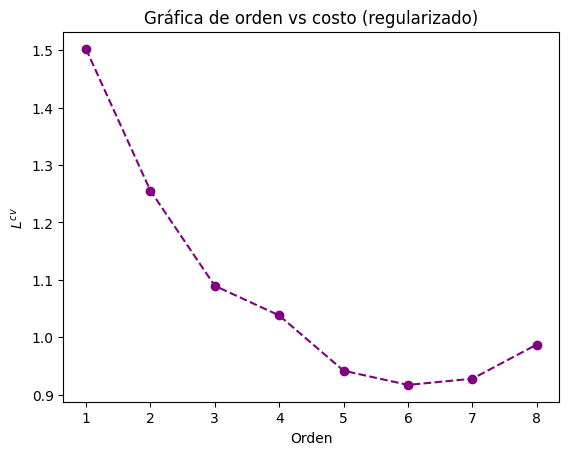

In [43]:
norder = 8
lmbd = 0.1
norder_l = [1,2,3,4,5,6,7,8]
x_test = np.linspace(0,30,100)
f_cost = np.ones_like(norder_l, dtype = float)
costos = np.zeros(norder)
for i in range(len(x_norm)):
  x_l = np.concatenate((x[0:i],x[i+1:]))
  y_l = np.concatenate((y[0:i],y[i+1:]))
  for n in range(1, norder+1):
    w_test,cost = w_n(x_norm,y,n, lmbd)
    f_cost[n-1] = cost
    costos[n-1] += f_cost[n-1]
costos_prom = costos/len(x_norm)
costos_prom

plt.plot(norder_l, costos_prom, '--o', color = 'purple')
plt.xlabel('Orden')
plt.ylabel('$L^{cv}$')
plt.title('Gráfica de orden vs costo (regularizado)')